In [1]:
%load_ext autoreload
%autoreload 2

# Applying CRIPS-DM Methodology to a Business Problem

## Dataset 1 - Predicting Customer Churn in the Telecomunication Provider

## 4. Evaluation

In our experimentation, our target was to address the imbalanced class distribution of the target variable using two different techniques:

**1. Applying Synthetic Minority Over-sampling Technique (SMOTE):** Our first approach is using the oversampling the minority class to balance the dataset.

**2. Utilizing the 'class_weight = balanced' parameter** The second technique is adjusting the class weights during the modelling phase. We will give higher weights to the minority class, influencing the model to place greate attention on predicting the churn cases.

Both of these techniques give us the distinct model performance, pointing out the importance of the trade-off in churn prediction.

Given our business problem, predicting the churn, we would priority more on accurately identifying potential churn cases. With that being said, we will prioritize the 'True Positive' rate, known as recall as 2e want to capture as many churn cases as possible, even if it would ends up on lower the precision score. This signifies that our model may predict customers to churn, even if they ultimately do not. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
logistic = pd.read_csv('../data/processed/model/1_logistic.csv')
svm_smote = pd.read_csv('../data/processed/model/2_svm_smote.csv')
svm = pd.read_csv('../data/processed/model/2_svm.csv')
dt_smote = pd.read_csv('../data/processed/model/3_dt_smote.csv')
dt = pd.read_csv('../data/processed/model/3_dt.csv')
rf_smote = pd.read_csv('../data/processed/model/4_rf_smote.csv')
rf = pd.read_csv('../data/processed/model/4_rf.csv')
gb_smote = pd.read_csv('../data/processed/model/5_gb_smote.csv')
gb = pd.read_csv('../data/processed/model/5_gb.csv')
baseline = pd.read_csv('../data/processed/model/0_baseline_model.csv')


In [4]:
models = {
    'Logistic Regression': logistic,
    'Support Vector Machine - SMOTE': svm_smote,
    'Support Vector Machine': svm,
    'Decision Tree - SMOTE': dt_smote,
    'Decision Tree': dt,
    'Random Forest - SMOTE': rf_smote,
    'Random Forest': rf,
    'Gradient Boosting - SMOTE': gb_smote,
    'Gradient Boosting': gb,
    'Baseline - Mode': baseline
}

In [5]:
all_models = pd.concat(models, keys=models.keys())

In [6]:
all_models = all_models.reset_index(level=1, drop=True)

#### Model Prediction and Performance

Upon evaluating the predictive models on the validation set, we observed varying performance metrics, with the recall score is a key focus. The result are presented in the table below, sorted by the recall score:

In [7]:
all_models.sort_values(by='recall', ascending=False)

,accuracy,precision,recall,f1-score,roc-auc
Decision Tree,0.766176,0.347826,0.750000,0.475248,0.827367
Decision Tree - SMOTE,0.829412,0.426471,0.604167,0.500000,0.786779
Gradient Boosting,0.916176,0.782609,0.562500,0.654545,0.836116
Support Vector Machine,0.842647,0.452991,0.552083,0.497653,0.764421
Gradient Boosting - SMOTE,0.913235,0.793651,0.520833,0.628931,0.827822
Random Forest,0.892647,0.657534,0.500000,0.568047,0.815907
Random Forest - SMOTE,0.861765,0.511905,0.447917,0.477778,0.783604
Support Vector Machine - SMOTE,0.864706,0.528571,0.385417,0.445783,0.730825
Logistic Regression,0.875000,0.612245,0.312500,0.413793,0.715308
Baseline - Mode,0.500000,1.000000,0.000000,0.000000,0.500000


Among the models, the Decision Tree using the 'class_weight = balanced'technique stands out with a recall score of 0.75, alongside with a respectable ROC-AUC score of 0.827.

#### Evaluating Model Performance on Test Set

We'll see how our model generalized with the unseen data with the test set. This set was split on the data preparation phase.

In [8]:
import joblib

In [9]:
decision_tree = joblib.load('../models/decision_tree.joblib')

In [10]:
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

In [12]:
y_preds = decision_tree.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
roc_auc = roc_auc_score(y_test, y_preds)

In [14]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Roc-auc: {roc_auc:.2f}")

Accuracy: 0.76
Precision: 0.34
Recall: 0.79
F1-score: 0.48
Roc-auc: 0.77


This evaluation provides valuable insights into the model's realworld applicability. Its high recall score point its capacity to effectively capture instances of churn, which alligns with our business objective of prioritzing customer retention.

#### Confusion Matrix

We further analyze the model's performance by a confusion matrix based on the predictions it made on the test set.

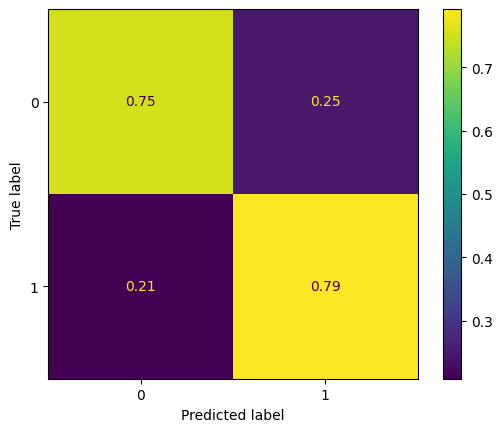

In [15]:
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test, normalize='true')

- **True Positives (TP):** The model accurately predicted approximately 78% of the actual churn cases. These instances involve customers who were correctly identified as likely to churn and indeed did churn.

- **True Negatives (TN):** Around 75% of non-churn instances were correctly predicted by the model. These cases encompass customers who were correctly identified as unlikely to churn and indeed did not churn.

- **False Positives (FP):** Approximately 25% of cases were erroneously predicted as churn. These scenarios entail instances where the model predicted churn, but the customers did not actually churn. This can be interpreted as a "false alarm" situation.

- **False Negatives (FN):** About 23% of actual churn cases were overlooked by the model. These situations comprise cases where the model predicted no churn, but the customers did churn. This highlights an area where we aim to enhance performance to improve recall.

### Emphasis on Recall and Business Implications

The model's high recall score of 0.78 pointing our focus on the business objective of accurately identifying potential churn cases. However, this emphasis on recall results in a trade-off, evident in the number of false positives. In such cases, some non-churning customers are misclassified as potential churners. This trade-off emphasizes the significance of striking a balance between recall and precision, in line with business priorities.

These findings suggest that while proactive efforts might be directed at customers who may not ultimately churn, the strategy is fundamentally proactive and preventive. This strategy contributes to the retention of a higher proportion of actual churn cases. As the business landscape evolves, continuous monitoring and adjustments will be critical to ensuring the model's performance aligns effectively with business goals.

## Limitations of the CRISP-DM Methodology

While the CRISP-DM provides a structured framework to follow, there are potential limitations to this methodology:

**1. Linear Sequential Phases:**
CRISP-DM follows a direct linear sequence of phases, starting from Business Understanding to Deployment. However, in real-world scenarios, some projects may require iterations or revisiting previous phases due to evolving business requirements or unexpected challenges. For example, during the data preparation stage, I chose to address the imbalanced dataset using SMOTE. However, during the process of building a predictive model, I realized that the oversampling technique might not adequately address the nature of the imbalanced dataset. As a result, I needed to revisit the data preparation phase and apply the class_weight = balanced technique.

**2. Lack of Emphasis on EDA:**
Another limitation relates to the emphasis on Exploratory Data Analysis (EDA):

While CRISP-DM includes a Data Understanding phase, it does not explicitly highlight the importance of thorough Exploratory Data Analysis (EDA) in uncovering insights that can significantly impact subsequent phases. For instance, during the Data Understanding phase of my project guided by CRISP-DM, I recognized the essential nature of conducting comprehensive EDA. It was during this phase that I discovered certain features exhibited skewed distributions and displayed outliers, indicating potential data quality issues. Neglecting to address these concerns appropriately could potentially impact subsequent phases, particularly the modeling process. Without conducting a thorough EDA, these critical data characteristics might have been overlooked, ultimately resulting in inaccurate business insights.

**3. Limited Guidance on Data Preprocessing Phase:**
Furthermore, a limitation lies in the guidance provided for the Data Preprocessing phase:

In real-world scenarios, datasets can be messy and may contain outliers or exhibit imbalanced class distributions. In our project focused on customer churn prediction, we encountered a dataset with imbalanced classes where the number of churn cases was significantly lower than non-churn cases. While CRISP-DM offered a structured roadmap, it did not offer explicit directions on best practices for addressing these challenges. Consequently, we needed to independently explore and implement methods like the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset and make informed decisions regarding outlier treatment. This required seeking external resources and conducting additional research to ensure the robustness of our analysis.

**4. Limited Guidance on Model Selection Phase:**
Another limitation became apparent during the Model Selection phase:

CRISP-DM provides a structured approach to building and evaluating models, but it lacks detailed guidance on advanced model selection techniques and hyperparameter tuning. For example, during the model evaluation phase, I utilized common metrics such as accuracy, precision, recall, and roc-auc to assess model performance. While the framework does offer a structured approach, it may not comprehensively cover advanced techniques. Whether this is a limitation depends on the perspective and context of the user.

**5. Inadequate Consideration of Business Domain Knowledge:**
Finally, an additional limitation is the framework's inadequate consideration of business domain knowledge:

While CRISP-DM provides a comprehensive framework for data mining and modeling, it does not highlight the importance of integrating domain knowledge. In my project, the emphasis on recall and its trade-off with precision reflects a deep understanding of the telecommunications business domain.

In summary, while CRISP-DM is designed to be a flexible and adaptable framework, allowing users to tailor their approach, these limitations highlight areas where the framework might benefit from enhancements or where users should supplement their expertise to ensure optimal outcomes.


## Cost Analysis in Tunning the Models

### Cost of False Negatives (Predicted Not Churning, but Actually Does):
False negatives are cases where the model predicts that a customer will not churn, but they actually do churn. The potential cost are as follow:

#### 1. Loss of Revenue:
When a customer churns, the company loses the revenue generated from their subscription. We'll assume the average monthly revenue. We will assume that average monthly revenue generated from a customer's subscription is $41. (https://www.canstarblue.com.au/phone/average-mobile-phone-bill/#:~:text=The%20average%20postpaid%20phone%20plan,in%20Tasmania%20are%20paying%20more.)

#### 2. Churn Recovery Cost:
If a customer churns, the company need to invest resources in targeted retention efforts to win the customer back. This include offering discounts, promotions. We will assume the average cost of retention is $30 per customer.

#### 3. Opportunity Cost:
Missed opportunities for upselling, cross-selling and other revenue generating activites from churned customer. We'll assume the average revenue generated from additional cost is $200.

#### 4. Customer Lifetime Value:
If a customer stays with us for an extended period, they generate revenue over time. Let's assume the average lifetime value of a retained customer is (clv = customer value * average customer life span)
Average account_length = 100 month -> (41 * 100) = $4100 per customer.

#### Total costs of False Negatives:
Total Cost = Loss of Revenue + Churn Recovery Cost + Opportunity Cost + Customer Lifetime Value

Total Cost = ($41 * A) + ($30 * A) + ($200 * A) + ($4100 * A)

```
Total Cost of Fasle Negatives = $4371 * A 
```
Where "A" represents the number of False Negative prediction by the models


### Cost of False Positives (Predicted Churning, but Actually Doesn't):
False positives are cases where the model predicts that a customer will churn, but they actually do not. The potential cost are as follow:

#### 1. Retention Costs:
Average cost of retention per customer: $30

#### 2. Marketing Costs:
Cost incurred in targeted marketing and retention efforts for customers predicted to churn but actually does not. We will assume the avearge marketing cost loses per customer of $50 

#### 3. Opportunity Cost:
The opportunity cost in the context of false positives refers to the potential benefits or revenue that a company misses out on when it invests resources in retaining customers predicted to churn but who ultimately don't. These resources could have been better used to target customers who truly need retention efforts. We'll assume opportunity cost of $200 per customer.

#### Total costs of False Positives:
Total Cost = Retention Cost + Marketing Cost + Opportunity Cost 

Total Cost = ($30 * B) + ($50 * B) + ($200 * B)

```
Total Cost of False Positives = $280 * B
```

Where "B" represents the number of False Positives prediction by the models.

### Cost Analysis on Decision Tree using Algorithmic Approach (class_weight='balanced')

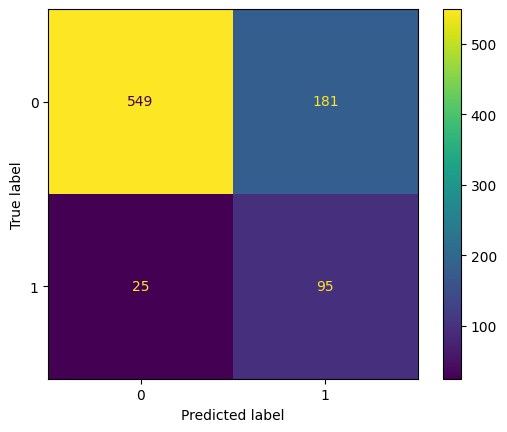

In [16]:
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test)

In [25]:
def cost_analysis(fn, fp):
    cost_fn = 4371 * fn
    cost_fp = 280 * fp
    total_cost = cost_fn + cost_fp
    
    print(f"Total Cost of False Negatives: ${cost_fn}\nTotal Cost of False Positives: ${cost_fp}\nTotal Cost Loss: ${total_cost}")

In [26]:
cost_analysis(25, 181)

Total Cost of False Negatives: $109275
Total Cost of False Positives: $50680
Total Cost Loss: $159955
